<a href="https://colab.research.google.com/github/kerryback/2022-BUSI520/blob/main/Misc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install sqlalchemy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import sqlite3
from sqlalchemy import create_engine

### Plotting a function

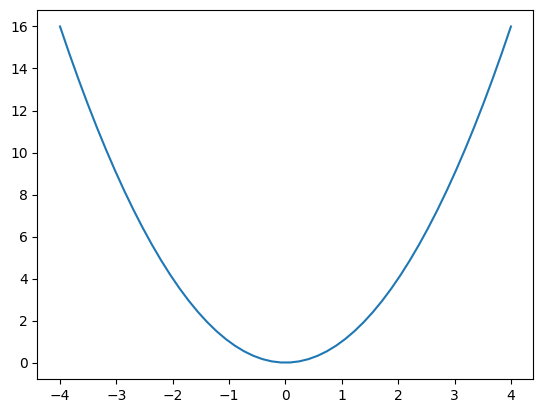

In [3]:
x = np.linspace(-4, 4, 50)
y = x**2
plt.plot(x, y)

### Plotting the normal distribution

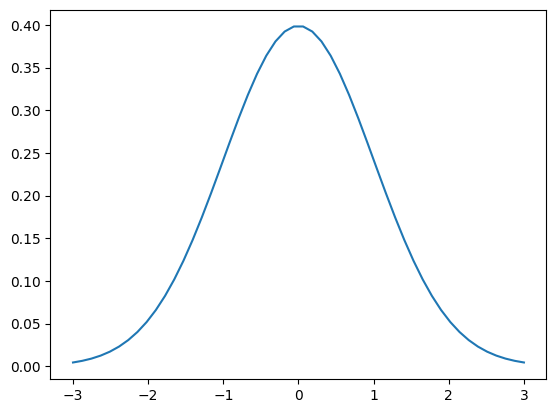

In [4]:
x = np.linspace(-3, 3, 50)
y = norm.pdf(x, loc=0, scale=1)
plt.plot(x,y)

### Example data frames

In [5]:
dct = dict(a=[0, 1, 2], b=[3, 4, 5])
df = pd.DataFrame(dct)

# arr = norm.rvs(size=12).reshape(4, 3)
# df = pd.DataFrame(arr, columns=['a', 'b', 'c']).round(1)

df

,a,b
0,0,3
1,1,4
2,2,5


### Summary statistics

In [6]:
# df.describe().round(2)

### Writing to a text file

In [7]:
f = open("test.txt", "w")
f.write("This is just a test.")
f.close()

In [8]:
f = open("test.txt", "a")
f.write("\nThis is a second test.")
f.close()

In [9]:
with open("test.txt", "a") as f:
    f.write("\nThis is a third test.")

In [10]:
with open("summarystats.txt", "w") as f:
    f.write(df.describe().round(2).to_latex())

C:\Users\kerry\AppData\Local\Temp\ipykernel_36664\3094611762.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df.describe().round(2).to_latex())


### Reading a text file

In [11]:
with open("test.txt", "r") as f:
    string = f.read()

# with open("summarystats.txt", "r") as f:
#    string = f.read()

print(string)

This is just a test.
This is a second test.
This is a third test.


### Reading filenames

In [12]:
import os
names = os.listdir()
notebooks = [x for x in names if "ipynb" in x]
notebooks

['AdvancedRegression.ipynb',
 'AssetPricingRegressions.ipynb',
 'Giovanni_web_scraping.ipynb',
 'Intro.ipynb',
 'Misc.ipynb',
 'ML1.ipynb',
 'ML2.ipynb',
 'Regression.ipynb',
 'RegularizedRegression.ipynb',
 'SQL.ipynb',
 'Visualization.ipynb',
 'wrds.ipynb']

### Scripts

* Use File/New File to create an empty file of python type named myscript.py.
* Paste from the following cell into it, and then save the file.
* Open a terminal window and cd to your working directory, or just use the Terminal feature at the bottom of the VS Code window.
* If python is on your path, execute "python myscript.py Bob" (without the quotes)
* If python is not on your path, you have to specify the path.  Replace "python" with something like
"C:\users\myname\Anaconda3\some more stuff\python".



    import sys
    name = sys.argv[1]
    print("Hello", name)
    with open("hello.txt", "w") as f:
        f.write("Hello " + name)


### SQL: Create a database

sqlite3.connect will connect to an existing database or create a new one if the database does not exist.

In [13]:
con = sqlite3.connect('mydata.db')
con.close()

### sqlalchemy

Connect to the database with sqlalchemy's create_engine


In [14]:
con = create_engine('sqlite:///./mydata.db').connect()

### Example data frame

SQLite only has five data types: integer, real, text, null, and blob (blob is for binary files like images).  We cannot store the pandas period type in a SQLite database, so we convert dates to strings.

In [15]:
data = pd.read_csv("https://www.dropbox.com/s/012c6y4gxsxss6y/ghz.csv?dl=1", parse_dates=["date"])
data.permno = data.permno.astype(int)
data.date = data.date.dt.to_period('M').astype(str)

### Write the data frame to a table in the database.

In [16]:
data.to_sql("table1", index=False, if_exists="replace", con=con)

282598

### Check that the table exists

In [17]:
pd.read_sql(" select * from sqlite_schema where type='table' ", con=con)

,type,name,tbl_name,rootpage,sql
0,table,table1,table1,2,"CREATE TABLE table1 (\n\tpermno INTEGER, \n\td..."


### See what the table looks like

In [18]:
pd.read_sql(" select * from table1 limit 5", con=con)

,permno,date,ret,acc,agr
0,10026,2010-01,0.046296,-0.068440,0.073944
1,10032,2010-01,0.194171,0.020917,0.082611
2,10051,2010-01,0.175705,-0.033651,0.071170
3,10078,2010-01,0.013874,-0.210465,-0.216736
4,10104,2010-01,-0.057888,-0.056229,0.003131


### Get data from the table with a filter

In [24]:
df = pd.read_sql(" select * from table1 where agr>0 order by date, permno", con=con)

print("(# rows, # columns) =", df.shape)
# print(df.info())
# print("minimum agr is", df.agr.min())

(# rows, # columns) = (205120, 5)


### Close the connection

In [20]:
con.close()

### View the database

Visit https://inloop.github.io/sqlite-viewer/

### Writing in chunks

You can read chunks larger than $10^5$.  This is just for illustration.  We use if_exists="append".

In [23]:
con = create_engine('sqlite:///./mydata.db').connect()

con.execute("drop table if exists table1")

filename = "https://www.dropbox.com/s/012c6y4gxsxss6y/ghz.csv?dl=1"

chunksize = 10 ** 5
for i, data in enumerate(pd.read_csv(filename, parse_dates=["date"], chunksize=chunksize)):
    print(i)
    data.permno = data.permno.astype(int)
    data.date = data.date.dt.to_period('M').astype(str)
    data.to_sql("table1", index=False, if_exists="append", con=con)


0
1
2
